# Contents

1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis


### 1. Importing Libraries and Data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
path = r'/Users/jacobyount/Documents/Data Analytics/Immersion 6/College Football Portal and Recruiting Analysis'

In [12]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'CFB_DF.pkl'))

In [13]:
df.head(50)

,season,first_name,last_name,position,school,transfer_to,transfer_date,rating,stars,eligibility,date_of_trasfer,time_of_transfer,ranking,committed_to,recruit_type,city,state_province,country,_merge
0,2021,Cameron,Wilkins,LB,Missouri,UT San Antonio,2021-07-31T14:46:00.000Z,NaN,3.0,Immediate,7/31/21,14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2021,Stephon,Wright,DL,Arizona State,SMU,2021-07-29T15:50:00.000Z,NaN,4.0,Immediate,7/29/21,15:50:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2021,Javar,Strong,S,Arkansas State,NaN,2021-07-28T15:25:00.000Z,NaN,3.0,Immediate,7/28/21,15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,2021,Noah,Mitchell,LB,UT San Antonio,NaN,2021-07-27T15:22:00.000Z,NaN,3.0,Immediate,7/27/21,15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,2021,Trivenskey,Mosley,RB,Southern Mississippi,NaN,2021-07-26T00:00:00.000Z,NaN,3.0,TBD,7/26/21,00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,2021,Jalar,Holley,DL,Miami,NaN,2021-07-25T15:28:00.000Z,NaN,3.0,Immediate,7/25/21,15:28:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,2021,Davon,Wells-Ross,LB,Wyoming,NaN,2021-07-23T15:30:00.000Z,NaN,2.0,Immediate,7/23/21,15:30:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7,2021,Samari,Saddler,IOL,Eastern Michigan,NaN,2021-07-23T11:00:00.000Z,NaN,2.0,Immediate,7/23/21,11:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8,2021,Bennett,Johnston,QB,Southern Mississippi,NaN,2021-07-22T14:32:00.000Z,NaN,NaN,Immediate,7/22/21,14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,2021,DeAngelo,Wilson,WR,Austin Peay,Western Kentucky,2021-07-21T15:13:00.000Z,NaN,2.0,Immediate,7/21/21,15:13:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [37]:
df['school'].head(50)

0                   Missouri
1              Arizona State
2             Arkansas State
3             UT San Antonio
4       Southern Mississippi
5                      Miami
6                    Wyoming
7           Eastern Michigan
8       Southern Mississippi
9                Austin Peay
10                Vanderbilt
11                     Tulsa
12    Missouri Western State
13          Georgia Southern
14                  Illinois
15             Florida State
16            South Carolina
17          Georgia Southern
18               Boise State
19             Virginia Tech
20             Virginia Tech
21             South Alabama
22                    Auburn
23                   Liberty
24                   McNeese
25             Arizona State
26                 Tennessee
27                Notre Dame
28                  Missouri
29                  Illinois
30                  Illinois
31                       LSU
32                  Illinois
33          Georgia Southern
34            

### 2. Cleaning Data

In [5]:
# Check for missing values

df.isnull().sum()

season                  0
first_name              0
last_name               0
position               19
school                280
transfer_to         48605
transfer_date       46403
rating               3837
stars                 678
eligibility         46403
date_of_trasfer     46403
time_of_transfer    46403
ranking              6138
committed_to        14299
recruit_type         5778
city                 6095
state_province       6106
country              5998
_merge                  0
dtype: int64

In [7]:
# leaving missing values for position, committed_to, recruit_type as they are not needed for this specific analysis. I will be replacing the stars and rating to the median.
df['stars'].fillna(df['stars'].median(), inplace=True)
df['rating'].fillna(df['rating'].median(), inplace = True)

In [8]:
df['ranking'].dropna(inplace = True)

In [9]:
df.isnull().sum()

season                  0
first_name              0
last_name               0
position               19
school                280
transfer_to         48605
transfer_date       46403
rating                  0
stars                   0
eligibility         46403
date_of_trasfer     46403
time_of_transfer    46403
ranking              6138
committed_to        14299
recruit_type         5778
city                 6095
state_province       6106
country              5998
_merge                  0
dtype: int64

In [11]:
# Creating data frame to use for machine learning

columns = ['season', 'position', 'stars', 'recruit_type', 'state_province', 'rating', 'committed_to', 'ranking']

In [13]:
df_2= df[columns][df['ranking'].isnull() == False]

In [14]:
df_2.tail()

,season,position,stars,recruit_type,state_province,rating,committed_to,ranking
52176,2023,WR,2.0,HighSchool,Ohio,0.7844,Bowling Green,2299.0
52177,2023,LS,2.0,HighSchool,Florida,0.7844,South Florida,2300.0
52178,2023,S,2.0,HighSchool,Hawaii,0.7833,Hawai'i,2301.0
52179,2023,CB,2.0,HighSchool,Missouri,0.7800,NaN,2302.0
52180,2023,TE,2.0,HighSchool,Indiana,0.7733,Illinois State,2303.0


In [15]:
# checking missing values for new data frame
df_2.isnull().sum()

season               0
position            18
stars                0
recruit_type         0
state_province     186
rating               0
committed_to      8411
ranking              0
dtype: int64

In [16]:
# checking for duplicates
dups = df_2.duplicated()

In [17]:
dups.shape

(46043,)

In [18]:
# no duplicates

### 3. Data Prep for Regression Analysis

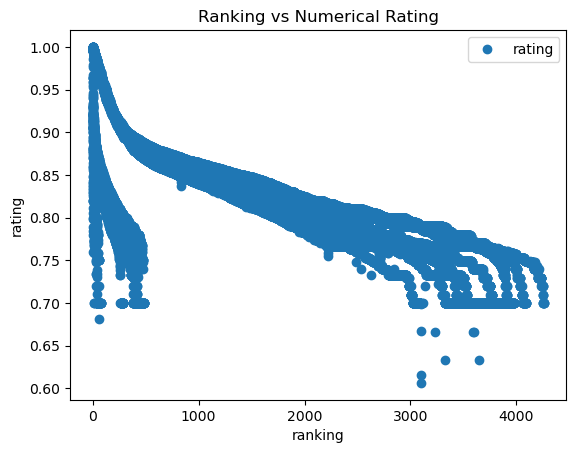

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_2.plot(x = 'ranking', y='rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Ranking vs Numerical Rating')  
plt.xlabel('ranking')  
plt.ylabel('rating')  
plt.show()

Hypothesis: If a player is has a low rating they have a lower ranking (higher numerical ranking in this instance).

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_2['ranking'].values.reshape(-1,1)
y = df_2['rating'].values.reshape(-1,1)

In [21]:
X

array([[1.000e+00],
       [2.000e+00],
       [3.000e+00],
       ...,
       [2.301e+03],
       [2.302e+03],
       [2.303e+03]])

In [22]:
y

array([[0.9997],
       [0.9995],
       [0.9979],
       ...,
       [0.7833],
       [0.78  ],
       [0.7733]])

In [23]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [24]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [25]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

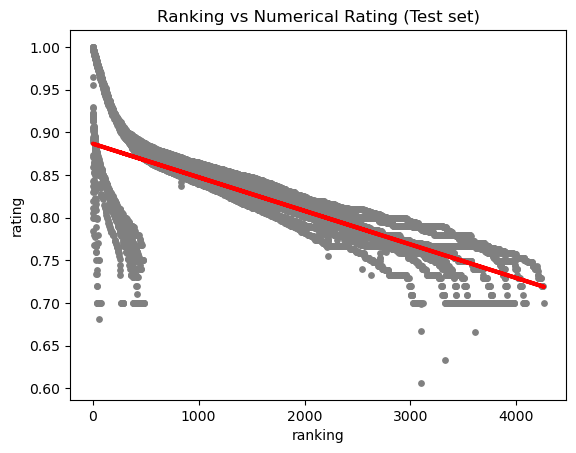

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Ranking vs Numerical Rating (Test set)')
plot_test.xlabel('ranking')
plot_test.ylabel('rating')
plot_test.show()

The line fits on the data well. There is a negative regression. 

In [28]:
# Model Statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.93560992e-05]]
Mean squared error:  0.0012028006388380016
R2 score:  0.6250030866113017


In [31]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,0.7732,0.781185
1,0.8152,0.829711
2,0.8721,0.868595
3,0.7097,0.756155
4,0.7381,0.755407
5,0.7667,0.776187
6,0.7932,0.800391
7,0.7731,0.781185
8,0.8336,0.825303
9,0.8111,0.878198


I think this model fits well with the data tested. The MSE is very low at 0.00120 and the r2 score is .625. Not a low score but not the highest. There could be some human bias as these rating and ranking are composed by people who might have certain biases towards these athletes. They could view them highly and increase there rankings unknowingly. 